<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>ML and DL</b></center>

<center><b><h1>Lab - 6</b></center>    
<pre>    

# Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris 

# Import iris data ser using sklearn

In [3]:
df = load_iris(as_frame=True)

In [4]:
# Display the first few rows of the dataframe
print(df['data'].head())
print(df['target'].head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


# Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Divide the data into input and output

In [6]:
x = df["data"]

In [7]:
y = df["target"]

In [8]:
y[129] = 1

# Splitting the dataset into the Training set and Test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Check the shape of the data
print(f"X shape: {x.shape}")
print(f"y shape: {y.shape}")
print(f"Target classes: {df['target_names']}")

X shape: (150, 4)
y shape: (150,)
Target classes: ['setosa' 'versicolor' 'virginica']


In [11]:
model = DecisionTreeClassifier(splitter='best')

In [12]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Display Decision Tree

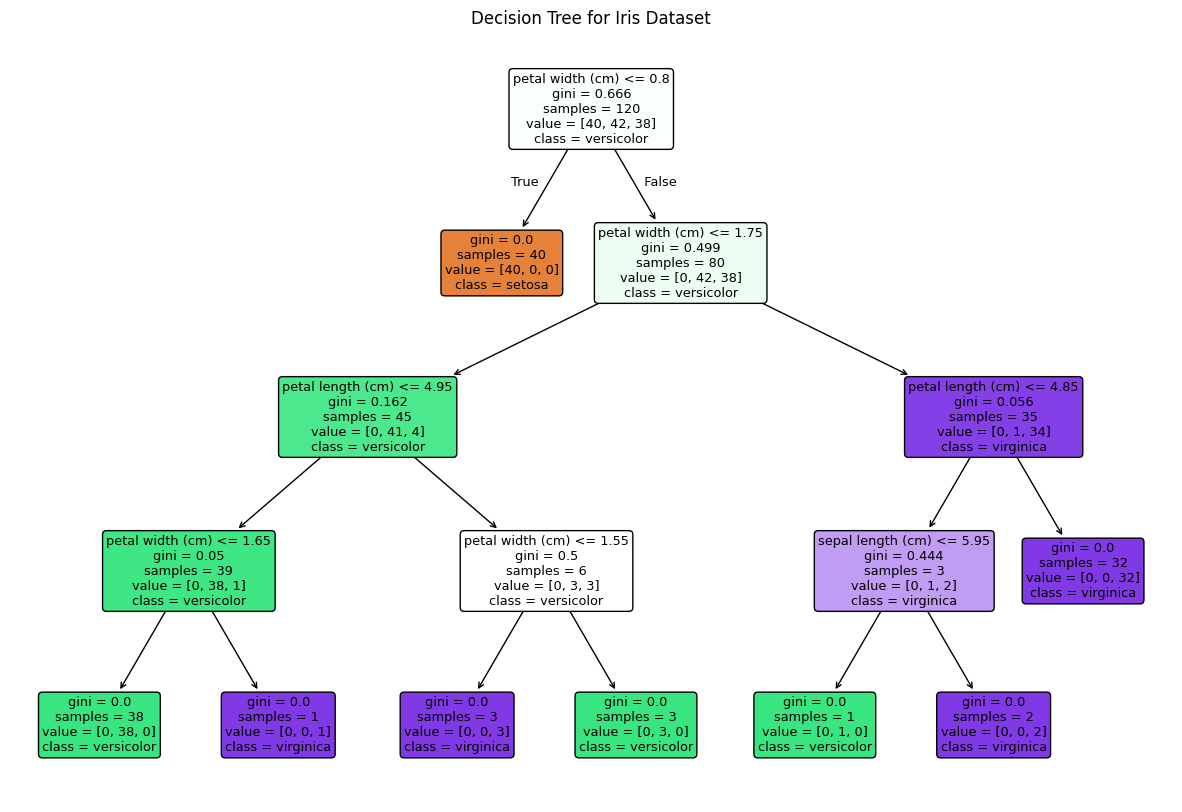

In [13]:
# Display Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=df['feature_names'], class_names=df['target_names'], filled=True, rounded=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

In [14]:
# Predict the x_test
y_pred = model.predict(X_test)
print(f"Test Predictions: {y_pred}")
print(f"Actual Labels: {y_test.values}")

# Calculate accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\\nConfusion Matrix:\\n{cm}")

# Classification Report
print(f"\\nClassification Report:\\n{classification_report(y_test, y_pred, target_names=df['target_names'])}")

Test Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Training Accuracy: 1.0000
Test Accuracy: 1.0000
\nConfusion Matrix:\n[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
\nClassification Report:\n              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
model.score(X_test, y_test)

1.0

# Import diabetes.csv dataset 

In [16]:
# Import diabetes.csv dataset
diabetes_df = pd.read_csv('diabetes.csv')
print("Diabetes dataset shape:", diabetes_df.shape)
print("\\nFirst few rows:")
print(diabetes_df.head())
print("\\nData types:")
print(diabetes_df.dtypes)

Diabetes dataset shape: (768, 9)
\nFirst few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627   50      Diabetic  
1                     0.351   31  Non Diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Non Diabetic  
4                     2.288   33      Diabetic  
\nData types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         

In [17]:
# Check the distribution of the target
print("Target distribution (original strings):")
print(diabetes_df['Outcome'].value_counts())
print("\\nTarget distribution percentage:")
print(diabetes_df['Outcome'].value_counts(normalize=True) * 100)

# Convert to numeric for modeling
diabetes_df['Outcome'] = diabetes_df['Outcome'].map({'Non Diabetic': 0, 'Diabetic': 1})
print(f"\\nAfter conversion to numeric:")
print(f"0 = Non Diabetic, 1 = Diabetic")
print(diabetes_df['Outcome'].value_counts())

Target distribution (original strings):
Outcome
Non Diabetic    500
Diabetic        268
Name: count, dtype: int64
\nTarget distribution percentage:
Outcome
Non Diabetic    65.104167
Diabetic        34.895833
Name: proportion, dtype: float64
\nAfter conversion to numeric:
0 = Non Diabetic, 1 = Diabetic
Outcome
0    500
1    268
Name: count, dtype: int64


# Check the distribution of the target

# Replace zeros with NaN for specific columns

In [18]:
# Replace zeros with NaN for specific columns (excluding Pregnancies and Outcome)
# First ensure Outcome is converted to numeric
if diabetes_df['Outcome'].dtype == 'object':
    diabetes_df['Outcome'] = diabetes_df['Outcome'].map({'Non Diabetic': 0, 'Diabetic': 1})

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[columns_with_zeros] = diabetes_df[columns_with_zeros].replace(0, np.nan)

print("Missing values after replacing zeros:")
print(diabetes_df.isnull().sum())

Missing values after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Check for missing values

In [19]:
# Check for missing values
print("Missing values before filling:")
print(diabetes_df.isnull().sum())
print(f"\\nTotal missing values: {diabetes_df.isnull().sum().sum()}")

Missing values before filling:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
\nTotal missing values: 652


# Fill missing values with median

In [20]:
# Fill missing values with median
for column in columns_with_zeros:
    median_val = diabetes_df[column].median()
    diabetes_df[column].fillna(median_val, inplace=True)
    print(f"{column}: filled with median {median_val:.2f}")

print("\\nMissing values after filling:")
print(diabetes_df.isnull().sum())

Glucose: filled with median 117.00
BloodPressure: filled with median 72.00
SkinThickness: filled with median 29.00
Insulin: filled with median 125.00
BMI: filled with median 32.30
\nMissing values after filling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/var/folders/3r/v2dbpgqn6wg47l8trfqk21lr0000gn/T/ipykernel_62336/2215472851.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df[column].fillna(median_val, inplace=True)
/var/folders/3r/v2dbpgqn6wg47l8trfqk21lr0000gn/T/ipykernel_62336/2215472851.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

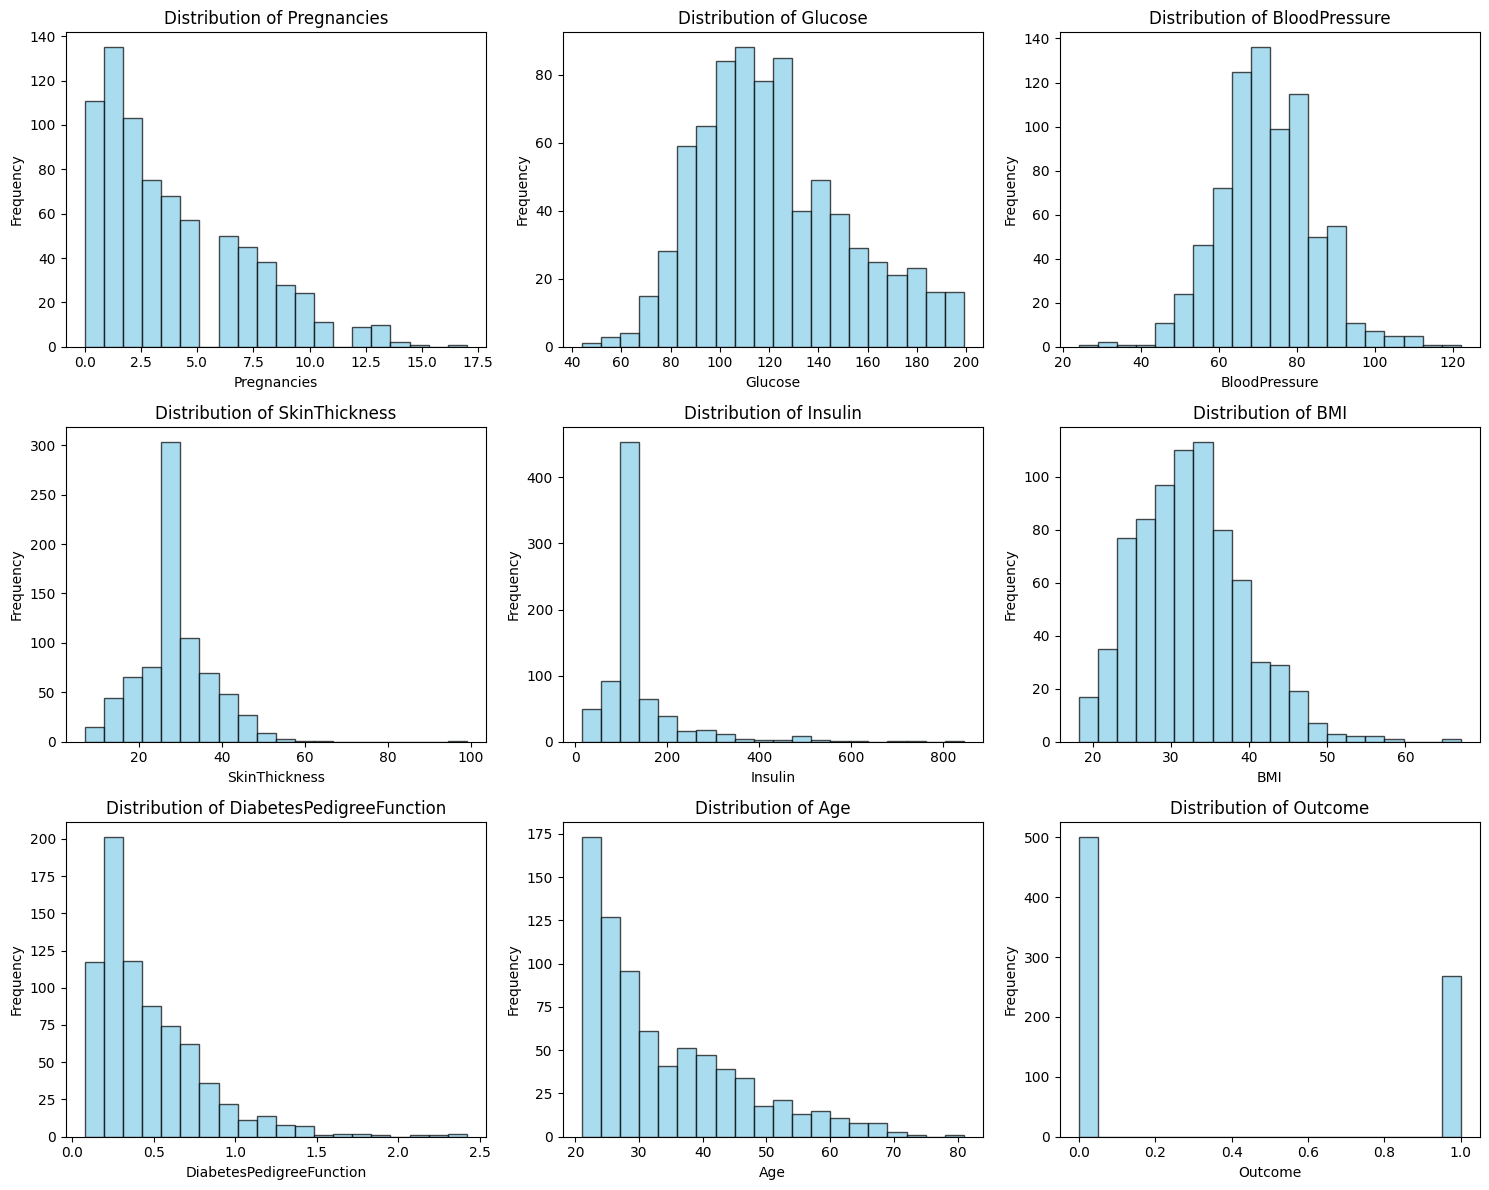

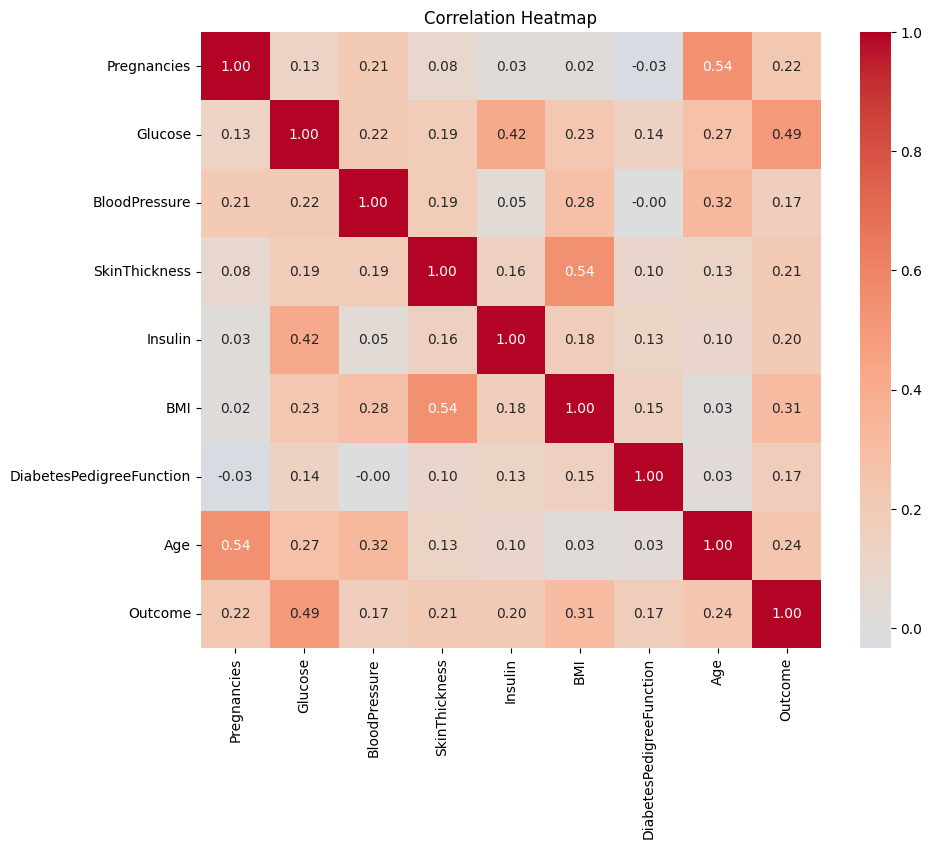

In [21]:
# Visualize Distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

# Plot distributions for each column
for i, column in enumerate(diabetes_df.columns):
    if i < len(diabetes_df.columns):
        axes[i].hist(diabetes_df[column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualize Distributions

# Convert Targer data into interger code

In [22]:
# Convert Target data into integer code (already handled in previous cells)
print("Data types:")
print(diabetes_df.dtypes)
print("\\nUnique target values:", diabetes_df['Outcome'].unique())
print("0 = Non Diabetic, 1 = Diabetic")

Data types:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
\nUnique target values: [1 0]
0 = Non Diabetic, 1 = Diabetic


In [23]:
# Check dataset info
print(diabetes_df.info())
print("\\nDataset description:")
print(diabetes_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
\nDataset description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073

# Divide the data into input and output

In [24]:
# Divide the data into input and output
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\\nFeature names: {list(X.columns)}")

X shape: (768, 8)
y shape: (768,)
\nFeature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [25]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\\nTraining set target distribution:")
print(y_train.value_counts(normalize=True))
print(f"\\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Training set size: 614
Test set size: 154
\nTraining set target distribution:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
\nTest set target distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


# Splitting the dataset into the Training set and Test set

# Create Model

In [26]:
# Create Model
model_diabetes = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
print("Decision Tree model created with:")
print(f"- Criterion: gini")
print(f"- Max depth: 5")
print(f"- Random state: 42")

Decision Tree model created with:
- Criterion: gini
- Max depth: 5
- Random state: 42


# Fitting DecisionTreeClassifier   on dataset

In [27]:
# Fitting DecisionTreeClassifier on dataset
model_diabetes.fit(X_train, y_train)
print("Model trained successfully!")
print(f"Number of features used: {model_diabetes.n_features_in_}")
print(f"Classes: {model_diabetes.classes_}")

Model trained successfully!
Number of features used: 8
Classes: [0 1]


# Display Decision Tree

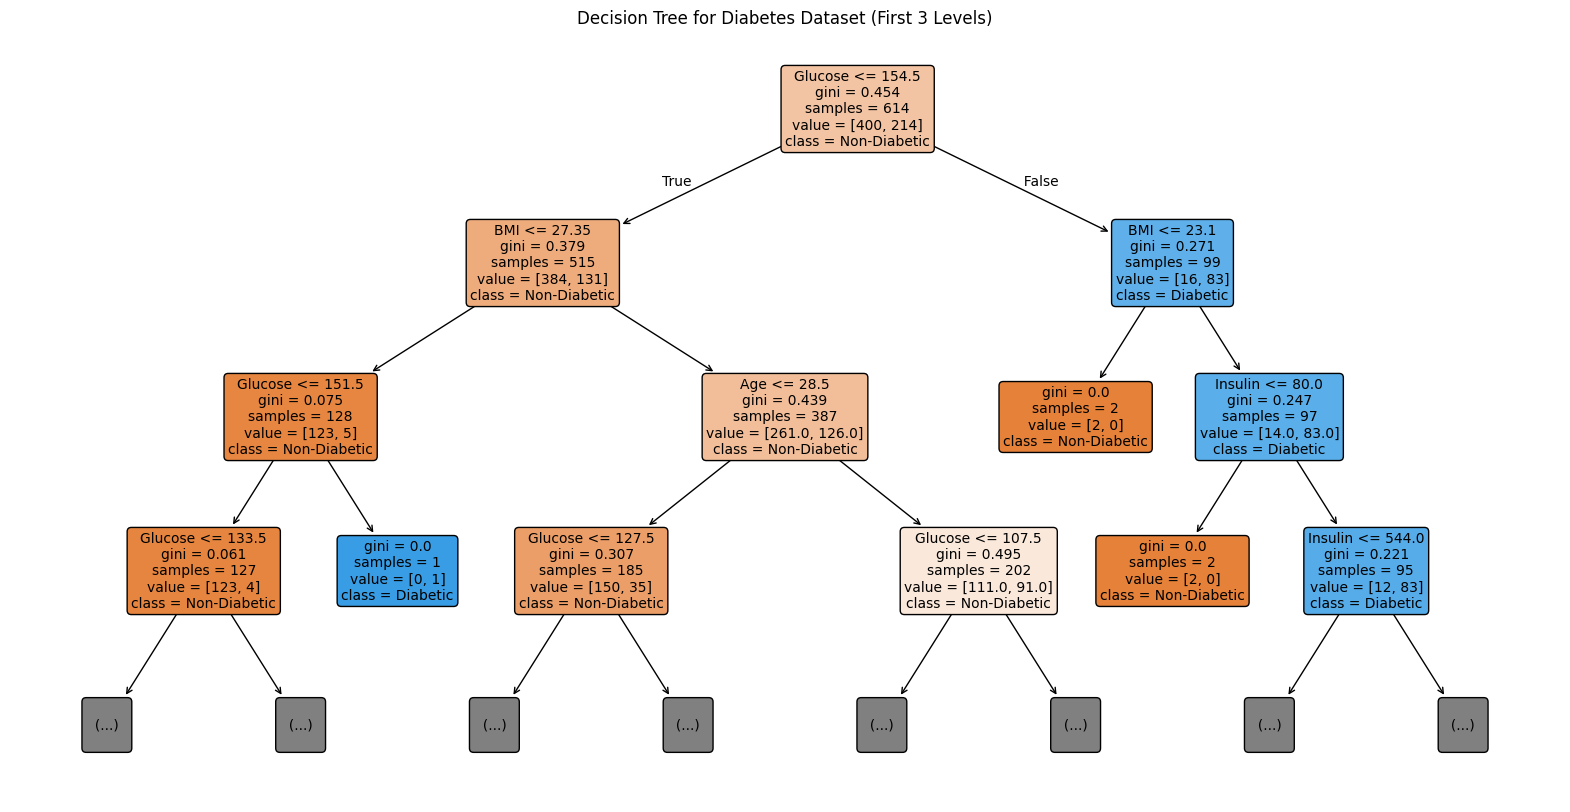

Tree depth: 5
Number of leaves: 19


In [28]:
# Display Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model_diabetes, 
               feature_names=X.columns, 
               class_names=['Non-Diabetic', 'Diabetic'],
               filled=True, 
               rounded=True,
               fontsize=10,
               max_depth=3)  # Limiting depth for readability
plt.title("Decision Tree for Diabetes Dataset (First 3 Levels)")
plt.show()

# Print tree parameters
print(f"Tree depth: {model_diabetes.get_depth()}")
print(f"Number of leaves: {model_diabetes.get_n_leaves()}")

# Predict the x_test 

In [29]:
# Predict the x_test
y_pred_diabetes = model_diabetes.predict(X_test)
y_pred_train = model_diabetes.predict(X_train)

print("Test Predictions (first 10):", y_pred_diabetes[:10])
print("Actual Labels (first 10):", y_test.values[:10])

Test Predictions (first 10): [1 0 0 1 0 0 0 1 0 1]
Actual Labels (first 10): [0 0 0 1 0 0 1 1 0 0]


# Display Training Accuracy

In [30]:
# Display Training Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Additional training metrics
print(f"\\nTraining Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=['Non-Diabetic', 'Diabetic']))

Training Accuracy: 0.8143 (81.43%)
\nTraining Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.91      0.79      0.85       400
    Diabetic       0.69      0.86      0.76       214

    accuracy                           0.81       614
   macro avg       0.80      0.82      0.81       614
weighted avg       0.83      0.81      0.82       614



# Display Test Accuracy

In [31]:
# Display Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred_diabetes)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Additional test metrics
print(f"\\nTest Classification Report:")
print(classification_report(y_test, y_pred_diabetes, target_names=['Non-Diabetic', 'Diabetic']))

Test Accuracy: 0.7597 (75.97%)
\nTest Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.84      0.78      0.81       100
    Diabetic       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



# Confusion Matrix

Confusion Matrix:
[[78 22]
 [15 39]]
\nTrue Negatives: 78
False Positives: 22
False Negatives: 15
True Positives: 39


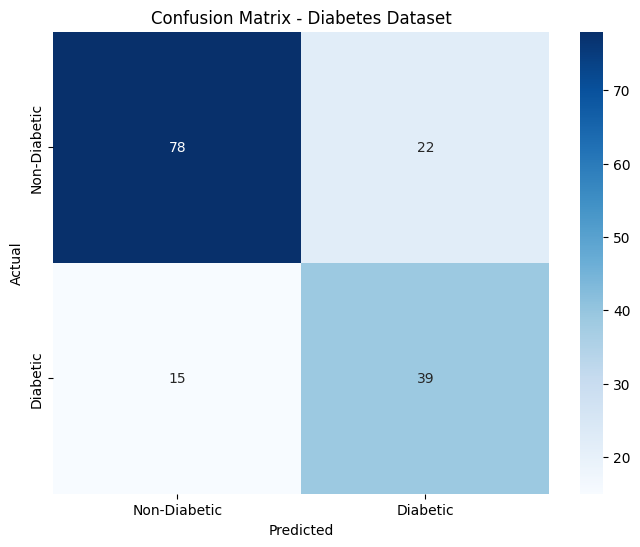

In [32]:
# Confusion Matrix
cm_diabetes = confusion_matrix(y_test, y_pred_diabetes)
print("Confusion Matrix:")
print(cm_diabetes)
print(f"\\nTrue Negatives: {cm_diabetes[0,0]}")
print(f"False Positives: {cm_diabetes[0,1]}")
print(f"False Negatives: {cm_diabetes[1,0]}")
print(f"True Positives: {cm_diabetes[1,1]}")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_diabetes, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Diabetes Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance:
                    feature  importance
1                   Glucose    0.572875
5                       BMI    0.200880
7                       Age    0.111960
4                   Insulin    0.037006
6  DiabetesPedigreeFunction    0.033923
2             BloodPressure    0.030970
3             SkinThickness    0.012386
0               Pregnancies    0.000000


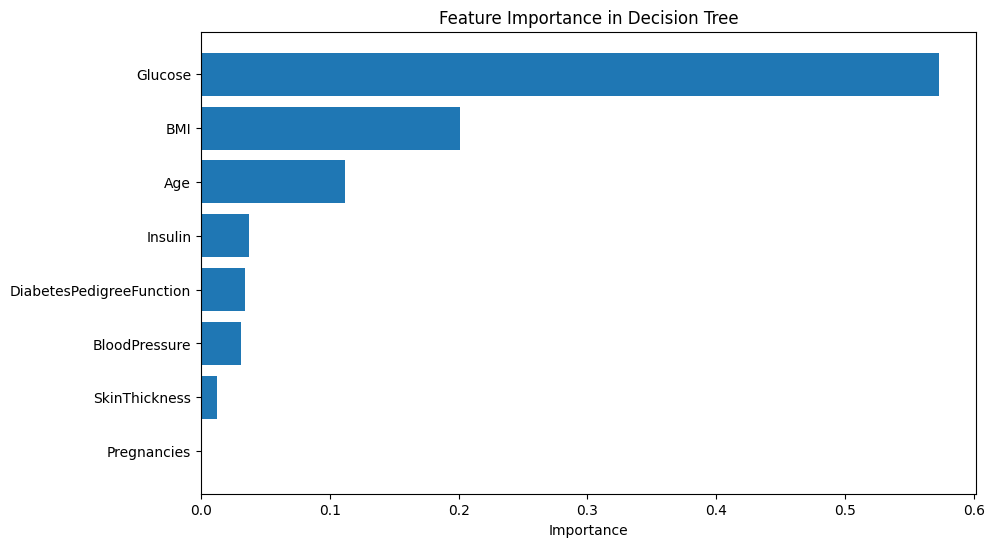

In [33]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_diabetes.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [34]:
# Summary Statistics
print("="*50)
print("DECISION TREE CLASSIFIER - SUMMARY")
print("="*50)
print(f"Dataset: Diabetes")
print(f"Features: {X.shape[1]}")
print(f"Total Samples: {X.shape[0]}")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")
print(f"\\nModel Performance:")
print(f"- Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"- Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"- Tree Depth: {model_diabetes.get_depth()}")
print(f"- Number of Leaves: {model_diabetes.get_n_leaves()}")
print(f"\\nTop 3 Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")
print("="*50)

DECISION TREE CLASSIFIER - SUMMARY
Dataset: Diabetes
Features: 8
Total Samples: 768
Training Samples: 614
Test Samples: 154
\nModel Performance:
- Training Accuracy: 0.8143 (81.43%)
- Test Accuracy: 0.7597 (75.97%)
- Tree Depth: 5
- Number of Leaves: 19
\nTop 3 Important Features:
  2. Glucose: 0.5729
  6. BMI: 0.2009
  8. Age: 0.1120


# Save Model State

In [35]:
import pickle

In [36]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model_diabetes, f)
print("Diabetes model saved to model.pkl")

Diabetes model saved to model.pkl


# Load Model from Disk

In [37]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print("Model loaded from model.pkl")
print(f"Loaded model type: {type(loaded_model)}")
print(f"Loaded model depth: {loaded_model.get_depth()}")

# Test the loaded model
test_pred = loaded_model.predict(X_test[:5])
print(f"Test prediction with loaded model: {test_pred}")
print(f"Actual labels: {y_test.values[:5]}")

Model loaded from model.pkl
Loaded model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Loaded model depth: 5
Test prediction with loaded model: [1 0 0 1 0]
Actual labels: [0 0 0 1 0]
